In [1]:
#Importing the libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Download real-world financial data for 5 stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(tickers, start='2018-01-01', end='2023-01-01')['Close']  # Changed 'Adj Close' to 'Close'

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [5]:
# Calculate daily returns for each stock
daily_returns = data.pct_change().dropna()

In [7]:
# Define Monte Carlo Simulation parameters
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(tickers)))
return_arr = np.zeros(num_portfolios)
risk_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

In [9]:
# Perform Monte Carlo Simulation
np.random.seed(42)
for i in range(num_portfolios):
    # Generate random portfolio weights
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    # Save the weights
    all_weights[i, :] = weights

    # Expected portfolio return
    return_arr[i] = np.sum(daily_returns.mean() * weights * 252)

    # Expected portfolio volatility (standard deviation)
    risk_arr[i] = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))

    # Sharpe Ratio (assuming risk-free rate = 0)
    sharpe_arr[i] = return_arr[i] / risk_arr[i]

In [11]:
# Find the portfolio with the highest Sharpe Ratio
max_sharpe_idx = sharpe_arr.argmax()
max_sharpe_weights = all_weights[max_sharpe_idx]
max_sharpe_return = return_arr[max_sharpe_idx]
max_sharpe_risk = risk_arr[max_sharpe_idx]

In [13]:
# Find the portfolio with the lowest risk (volatility)
min_risk_idx = risk_arr.argmin()
min_risk_weights = all_weights[min_risk_idx]
min_risk_return = return_arr[min_risk_idx]
min_risk_risk = risk_arr[min_risk_idx]

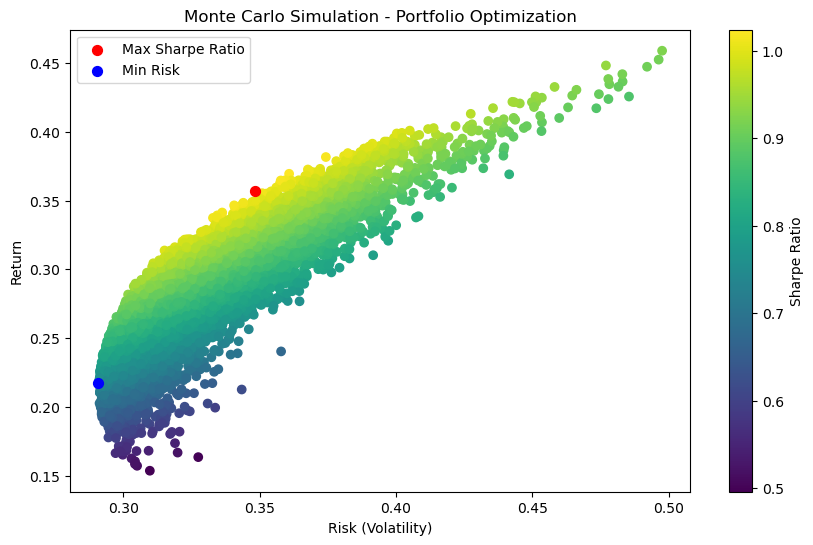

In [15]:
# Plot the results of the simulation
plt.figure(figsize=(10, 6))
plt.scatter(risk_arr, return_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
# Mark the highest Sharpe ratio portfolio
plt.scatter(max_sharpe_risk, max_sharpe_return, c='red', s=50, label='Max Sharpe Ratio')
plt.scatter(min_risk_risk, min_risk_return, c='blue', s=50, label='Min Risk')

plt.title('Monte Carlo Simulation - Portfolio Optimization')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Return')
plt.legend()
plt.show()

In [17]:
# Display results
print("Portfolio with the highest Sharpe Ratio:")
print(f"Weights: {max_sharpe_weights}")
print(f"Expected Return: {max_sharpe_return:.4f}")
print(f"Expected Risk: {max_sharpe_risk:.4f}")
print(f"Sharpe Ratio: {sharpe_arr[max_sharpe_idx]:.4f}\n")

Portfolio with the highest Sharpe Ratio:
Weights: [0.35002374 0.00450743 0.00720032 0.35475248 0.28351604]
Expected Return: 0.3568
Expected Risk: 0.3484
Sharpe Ratio: 1.0241



In [19]:
print("Portfolio with the lowest risk (volatility):")
print(f"Weights: {min_risk_weights}")
print(f"Expected Return: {min_risk_return:.4f}")
print(f"Expected Risk: {min_risk_risk:.4f}")

Portfolio with the lowest risk (volatility):
Weights: [0.21958062 0.1435591  0.29809267 0.33673381 0.0020338 ]
Expected Return: 0.2173
Expected Risk: 0.2909
